In [ ]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate a messy dataset
data = {
    'customer_id': [101, 102, 103, 104, 104, 105, 106, 107, 108, 109],
    'age': [25, np.nan, 35, 45, 45, 52, 120, 30, np.nan, 40],
    'income': [50000, 60000, 70000, 80000, 80000, 200000, 150000, np.nan, 90000, 100000]
}
df = pd.DataFrame(data)


In [2]:
# Remove exact duplicate rows
df = df.drop_duplicates()

# Optionally, remove duplicate customer IDs
df = df.drop_duplicates(subset='customer_id', keep='first')


In [3]:
# Option 1: Impute with mean (for demonstration)
df['age'].fillna(df['age'].mean(), inplace=True)
df['income'].fillna(df['income'].median(), inplace=True)

# Option 2: Drop rows with missing values (if appropriate)
# df.dropna(inplace=True)


In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'age')
df = remove_outliers_iqr(df, 'income')


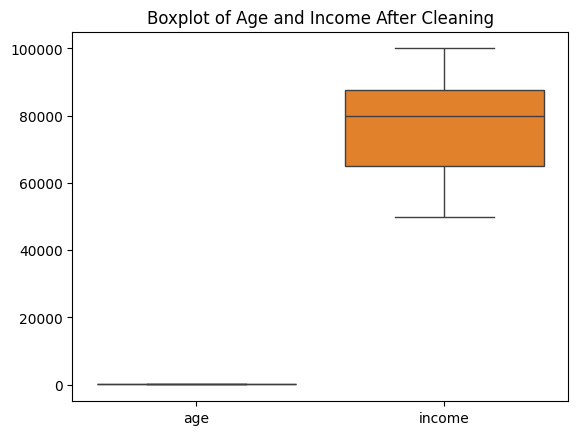

In [5]:
sns.boxplot(data=df[['age', 'income']])
plt.title('Boxplot of Age and Income After Cleaning')
plt.show()


In [ ]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.



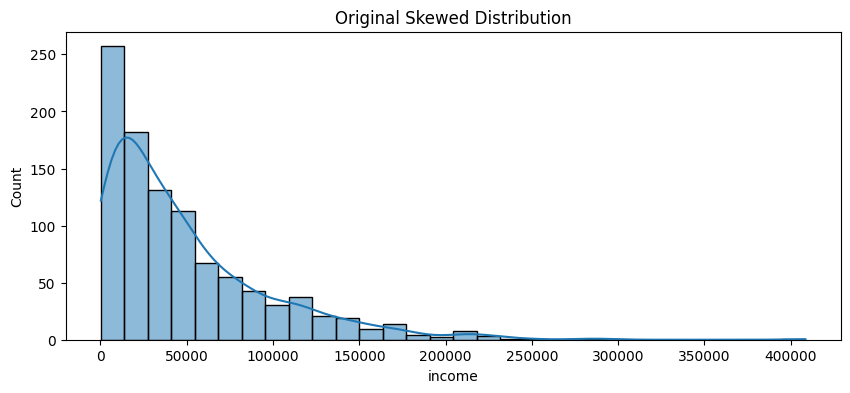

Original Skewness: 1.87


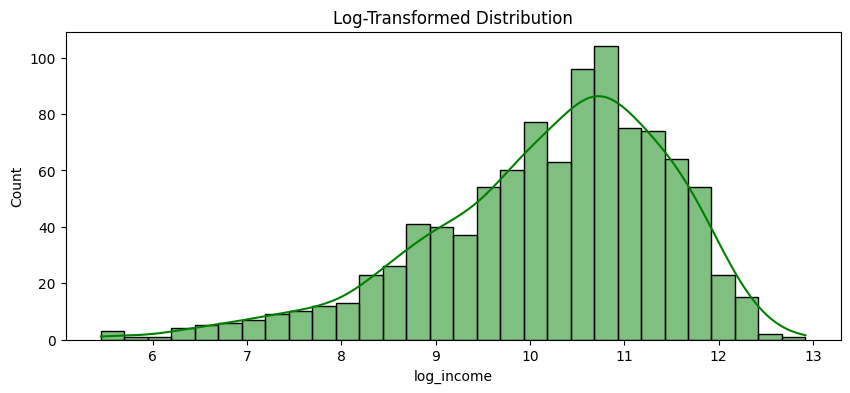

Transformed Skewness: -0.83


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# 1. Create a skewed dataset
np.random.seed(42)
data = {'income': np.random.exponential(scale=50000, size=1000)}  # right-skewed
df = pd.DataFrame(data)

# 2. Visualize original distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['income'], kde=True, bins=30)
plt.title("Original Skewed Distribution")
plt.show()

# 3. Check skewness
original_skew = skew(df['income'])
print(f"Original Skewness: {original_skew:.2f}")

# 4. Apply log transformation
df['log_income'] = np.log1p(df['income'])  # log1p handles zero values safely

# 5. Visualize transformed distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['log_income'], kde=True, bins=30, color='green')
plt.title("Log-Transformed Distribution")
plt.show()

# 6. Check skewness after transformation
transformed_skew = skew(df['log_income'])
print(f"Transformed Skewness: {transformed_skew:.2f}")


In [8]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.

import pandas as pd
import numpy as np

# Sample dataset
df = pd.DataFrame({
    'purchase_amount': [120, 500, 60, 300],
    'number_of_items': [4, 10, 2, 6],
    'customer_since': [2, 5, 1, 3],  # years
    'visits_last_month': [5, 20, 3, 10]
})

# Original data
print("Original Data:\n", df)

# 1. Average spend per item
df['avg_spend_per_item'] = df['purchase_amount'] / df['number_of_items']

# 2. Spend per visit
df['spend_per_visit'] = df['purchase_amount'] / df['visits_last_month']

# 3. Customer engagement score (hypothetical): visits per year
df['engagement_score'] = df['visits_last_month'] / df['customer_since']

# 4. Loyalty tier (categorical feature based on customer_since)
df['loyalty_tier'] = pd.cut(df['customer_since'], bins=[0, 2, 4, np.inf], labels=['New', 'Regular', 'Loyal'])

# Final data
print("\nEngineered Features:\n", df)



Original Data:
    purchase_amount  number_of_items  customer_since  visits_last_month
0              120                4               2                  5
1              500               10               5                 20
2               60                2               1                  3
3              300                6               3                 10

Engineered Features:
    purchase_amount  number_of_items  customer_since  visits_last_month  \
0              120                4               2                  5   
1              500               10               5                 20   
2               60                2               1                  3   
3              300                6               3                 10   

   avg_spend_per_item  spend_per_visit  engagement_score loyalty_tier  
0                30.0             24.0          2.500000          New  
1                50.0             25.0          4.000000        Loyal  
2                30

In [9]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.

import pandas as pd
import numpy as np
from scipy import stats

# Create a sample dataset with outliers
data = {
    'sales': [100, 110, 115, 120, 125, 130, 135, 140, 145, 1000]  # 1000 is a likely outlier
}
df = pd.DataFrame(data)

# Calculate Z-scores
df['z_score'] = stats.zscore(df['sales'])

# Flag outliers
threshold = 3
df['is_outlier'] = df['z_score'].abs() > threshold

# Filter clean data
df_cleaned = df[~df['is_outlier']]

# Output
print("Original Data with Z-scores:\n", df)
print("\nCleaned Data (Outliers Removed):\n", df_cleaned)



Original Data with Z-scores:
    sales   z_score  is_outlier
0    100 -0.425865       False
1    110 -0.387841       False
2    115 -0.368829       False
3    120 -0.349817       False
4    125 -0.330806       False
5    130 -0.311794       False
6    135 -0.292782       False
7    140 -0.273770       False
8    145 -0.254758       False
9   1000  2.996263       False

Cleaned Data (Outliers Removed):
    sales   z_score  is_outlier
0    100 -0.425865       False
1    110 -0.387841       False
2    115 -0.368829       False
3    120 -0.349817       False
4    125 -0.330806       False
5    130 -0.311794       False
6    135 -0.292782       False
7    140 -0.273770       False
8    145 -0.254758       False
9   1000  2.996263       False


In [11]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# 1. Create sample data with missing values
data = {
    'age': [25, 27, np.nan, 30, 29],
    'income': [50000, 54000, 58000, np.nan, 62000],
    'score': [200, 210, 190, 205, np.nan]
}

df = pd.DataFrame(data)
print("Original Data with Missing Values:\n", df)

# 2. Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=2)

# 3. Apply the imputer
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 4. Output the results
print("\nImputed Data:\n", df_imputed)



Original Data with Missing Values:
     age   income  score
0  25.0  50000.0  200.0
1  27.0  54000.0  210.0
2   NaN  58000.0  190.0
3  30.0      NaN  205.0
4  29.0  62000.0    NaN

Imputed Data:
     age   income  score
0  25.0  50000.0  200.0
1  27.0  54000.0  210.0
2  28.5  58000.0  190.0
3  30.0  58000.0  205.0
4  29.0  62000.0  197.5


In [10]:
!pip install scikit-learn pandas


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
